In [1]:
!pip install opencv-python mediapipe sklearn matplotlib

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('HAPPY HANDS', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
draw_landmarks(frame, results)

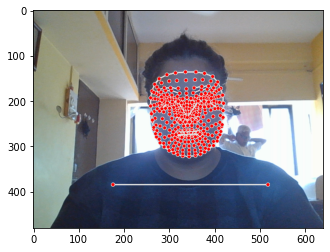

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.53221083,  0.49209622, -1.38682115, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.5495404 ,  0.5758146 , -3.50618172, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [17]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('HAPPY HANDS', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [21]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [22]:
np.array(sequences).shape

(90, 30, 1662)

In [23]:
np.array(labels).shape

(90,)

In [24]:
X = np.array(sequences)

In [25]:
X.shape

(90, 30, 1662)

In [26]:
y = to_categorical(labels).astype(int)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [28]:
X_train.shape

(85, 30, 1662)

In [29]:
X_test.shape

(5, 30, 1662)

In [30]:
y_train.shape

(85, 3)

In [31]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from keras.models import load_model

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 182ms/step - loss: 8.8001 - categorical_accuracy: 0.3882
Epoch 2/2000
3/3 [==============================] - 1s 184ms/step - loss: 17.8877 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 123ms/step - loss: 6.3305 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 128ms/step - loss: 27.1387 - categorical_accuracy: 0.3294
Epoch 5/2000
3/3 [==============================] - 0s 131ms/step - loss: 60.2283 - categorical_accuracy: 0.2588
Epoch 6/2000
3/3 [==============================] - 0s 125ms/step - loss: 38.5273 - categorical_accuracy: 0.2471
Epoch 7/2000
3/3 [==============================] - 0s 130ms/step - loss: 21.4917 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 0s 158ms/step - loss: 19.8373 - categorical_accuracy: 0.3294
Epoch 9/2000
3/3 [==============================] - 1s 185ms/step - loss: 29.5358 - categorical_ac

3/3 [==============================] - 0s 132ms/step - loss: 122.0541 - categorical_accuracy: 0.3059
Epoch 73/2000
3/3 [==============================] - 0s 137ms/step - loss: 41.2415 - categorical_accuracy: 0.2824
Epoch 74/2000
3/3 [==============================] - 0s 140ms/step - loss: 47.9285 - categorical_accuracy: 0.3647
Epoch 75/2000
3/3 [==============================] - 1s 206ms/step - loss: 63.2474 - categorical_accuracy: 0.2471
Epoch 76/2000
3/3 [==============================] - 0s 142ms/step - loss: 47.1673 - categorical_accuracy: 0.4000
Epoch 77/2000
3/3 [==============================] - 0s 133ms/step - loss: 167.4517 - categorical_accuracy: 0.3529
Epoch 78/2000
3/3 [==============================] - 0s 143ms/step - loss: 157.5253 - categorical_accuracy: 0.2824
Epoch 79/2000
3/3 [==============================] - 0s 137ms/step - loss: 66.9758 - categorical_accuracy: 0.3176
Epoch 80/2000
3/3 [==============================] - 0s 131ms/step - loss: 121.3407 - categorical_a

3/3 [==============================] - 0s 138ms/step - loss: 1.5086 - categorical_accuracy: 0.5529
Epoch 144/2000
3/3 [==============================] - 0s 124ms/step - loss: 2.1462 - categorical_accuracy: 0.4235
Epoch 145/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.5413 - categorical_accuracy: 0.6118
Epoch 146/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.4017 - categorical_accuracy: 0.5529
Epoch 147/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.1678 - categorical_accuracy: 0.5765
Epoch 148/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.3076 - categorical_accuracy: 0.5765
Epoch 149/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.1526 - categorical_accuracy: 0.5765
Epoch 150/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.3014 - categorical_accuracy: 0.4824
Epoch 151/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.5075 - categorical_accura

Epoch 215/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.8118 - categorical_accuracy: 0.6118
Epoch 216/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.7561 - categorical_accuracy: 0.6941
Epoch 217/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.8082 - categorical_accuracy: 0.6706
Epoch 218/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.7851 - categorical_accuracy: 0.6588
Epoch 219/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.7637 - categorical_accuracy: 0.6353
Epoch 220/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.7986 - categorical_accuracy: 0.6353
Epoch 221/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.7619 - categorical_accuracy: 0.6706
Epoch 222/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.7782 - categorical_accuracy: 0.6471
Epoch 223/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.7399 - cat

3/3 [==============================] - 0s 121ms/step - loss: 0.5639 - categorical_accuracy: 0.8118
Epoch 287/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.5211 - categorical_accuracy: 0.8118
Epoch 288/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.5262 - categorical_accuracy: 0.8235
Epoch 289/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.5269 - categorical_accuracy: 0.8118
Epoch 290/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.5273 - categorical_accuracy: 0.8118
Epoch 291/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.5181 - categorical_accuracy: 0.8235
Epoch 292/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.5433 - categorical_accuracy: 0.8000
Epoch 293/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.5103 - categorical_accuracy: 0.8235
Epoch 294/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.5125 - categorical_accura

Epoch 358/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.4390 - categorical_accuracy: 0.8471
Epoch 359/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.4787 - categorical_accuracy: 0.8118
Epoch 360/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.4705 - categorical_accuracy: 0.8118
Epoch 361/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.4776 - categorical_accuracy: 0.8353
Epoch 362/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.4471 - categorical_accuracy: 0.8353
Epoch 363/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.4471 - categorical_accuracy: 0.8471
Epoch 364/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.4536 - categorical_accuracy: 0.8588
Epoch 365/2000
3/3 [==============================] - 1s 196ms/step - loss: 0.4424 - categorical_accuracy: 0.8353
Epoch 366/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.4614 - cat

3/3 [==============================] - 1s 199ms/step - loss: 0.4021 - categorical_accuracy: 0.8588
Epoch 430/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.4057 - categorical_accuracy: 0.8588
Epoch 431/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.3977 - categorical_accuracy: 0.8824
Epoch 432/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.4241 - categorical_accuracy: 0.8588
Epoch 433/2000
3/3 [==============================] - 0s 169ms/step - loss: 0.3930 - categorical_accuracy: 0.8706
Epoch 434/2000
3/3 [==============================] - 1s 203ms/step - loss: 0.4095 - categorical_accuracy: 0.8824
Epoch 435/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3999 - categorical_accuracy: 0.8588
Epoch 436/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3967 - categorical_accuracy: 0.8824
Epoch 437/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3919 - categorical_accura

Epoch 501/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.3605 - categorical_accuracy: 0.8706
Epoch 502/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.3648 - categorical_accuracy: 0.8824
Epoch 503/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.3526 - categorical_accuracy: 0.8824
Epoch 504/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3537 - categorical_accuracy: 0.8706
Epoch 505/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3518 - categorical_accuracy: 0.8706
Epoch 506/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3508 - categorical_accuracy: 0.8824
Epoch 507/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3507 - categorical_accuracy: 0.8824
Epoch 508/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3483 - categorical_accuracy: 0.8824
Epoch 509/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.3533 - cat

3/3 [==============================] - 0s 126ms/step - loss: 0.3233 - categorical_accuracy: 0.8824
Epoch 573/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.3261 - categorical_accuracy: 0.8941
Epoch 574/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.3210 - categorical_accuracy: 0.8941
Epoch 575/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.3219 - categorical_accuracy: 0.8824
Epoch 576/2000
3/3 [==============================] - 0s 159ms/step - loss: 0.3202 - categorical_accuracy: 0.8824
Epoch 577/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.3218 - categorical_accuracy: 0.8941
Epoch 578/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.3149 - categorical_accuracy: 0.8941
Epoch 579/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3188 - categorical_accuracy: 0.8706
Epoch 580/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.3110 - categorical_accura

Epoch 644/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.2850 - categorical_accuracy: 0.9059
Epoch 645/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.2916 - categorical_accuracy: 0.9294
Epoch 646/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.2827 - categorical_accuracy: 0.9059
Epoch 647/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.2895 - categorical_accuracy: 0.8941
Epoch 648/2000
3/3 [==============================] - 0s 151ms/step - loss: 0.2849 - categorical_accuracy: 0.9412
Epoch 649/2000
3/3 [==============================] - 0s 145ms/step - loss: 0.2861 - categorical_accuracy: 0.9294
Epoch 650/2000
3/3 [==============================] - 1s 194ms/step - loss: 0.2932 - categorical_accuracy: 0.8941
Epoch 651/2000
3/3 [==============================] - 1s 206ms/step - loss: 0.2978 - categorical_accuracy: 0.9176
Epoch 652/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.2885 - cat

3/3 [==============================] - 0s 126ms/step - loss: 0.2615 - categorical_accuracy: 0.9294
Epoch 716/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.2372 - categorical_accuracy: 0.9294
Epoch 717/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.2481 - categorical_accuracy: 0.9176
Epoch 718/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.2368 - categorical_accuracy: 0.9294
Epoch 719/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.2430 - categorical_accuracy: 0.9294
Epoch 720/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.2343 - categorical_accuracy: 0.9294
Epoch 721/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.2302 - categorical_accuracy: 0.9294
Epoch 722/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.2331 - categorical_accuracy: 0.9176
Epoch 723/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.2281 - categorical_accura

Epoch 787/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.3292 - categorical_accuracy: 0.8941
Epoch 788/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.3195 - categorical_accuracy: 0.8824
Epoch 789/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.3124 - categorical_accuracy: 0.8706
Epoch 790/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3352 - categorical_accuracy: 0.8706
Epoch 791/2000
3/3 [==============================] - 1s 205ms/step - loss: 0.3078 - categorical_accuracy: 0.8941
Epoch 792/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.3050 - categorical_accuracy: 0.8824
Epoch 793/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.3048 - categorical_accuracy: 0.8706
Epoch 794/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.3022 - categorical_accuracy: 0.8941
Epoch 795/2000
3/3 [==============================] - 1s 206ms/step - loss: 0.2889 - cat

3/3 [==============================] - 0s 130ms/step - loss: 0.2354 - categorical_accuracy: 0.8941
Epoch 859/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.2156 - categorical_accuracy: 0.9176
Epoch 860/2000
3/3 [==============================] - 1s 177ms/step - loss: 0.2045 - categorical_accuracy: 0.9059
Epoch 861/2000
3/3 [==============================] - 1s 164ms/step - loss: 0.2239 - categorical_accuracy: 0.9294
Epoch 862/2000
3/3 [==============================] - 0s 155ms/step - loss: 0.2193 - categorical_accuracy: 0.9059
Epoch 863/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.2177 - categorical_accuracy: 0.9176
Epoch 864/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.2068 - categorical_accuracy: 0.9176
Epoch 865/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.2035 - categorical_accuracy: 0.9176
Epoch 866/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.2178 - categorical_accura

Epoch 930/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.2308 - categorical_accuracy: 0.9176
Epoch 931/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.2426 - categorical_accuracy: 0.8941
Epoch 932/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.2529 - categorical_accuracy: 0.9176
Epoch 933/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.3353 - categorical_accuracy: 0.8706
Epoch 934/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.3202 - categorical_accuracy: 0.8706
Epoch 935/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.3464 - categorical_accuracy: 0.8353
Epoch 936/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3762 - categorical_accuracy: 0.8353
Epoch 937/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.3723 - categorical_accuracy: 0.8353
Epoch 938/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.3066 - cat

3/3 [==============================] - 0s 172ms/step - loss: 0.1998 - categorical_accuracy: 0.9059
Epoch 1002/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.1769 - categorical_accuracy: 0.9294
Epoch 1003/2000


KeyboardInterrupt: 

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [38]:
res = model.predict(X_test)

In [39]:
actions[np.argmax(res[4])]

'iloveyou'

In [40]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [42]:
model.save('action.h5')

In [43]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_test)

In [46]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [49]:
from scipy import stats

In [50]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

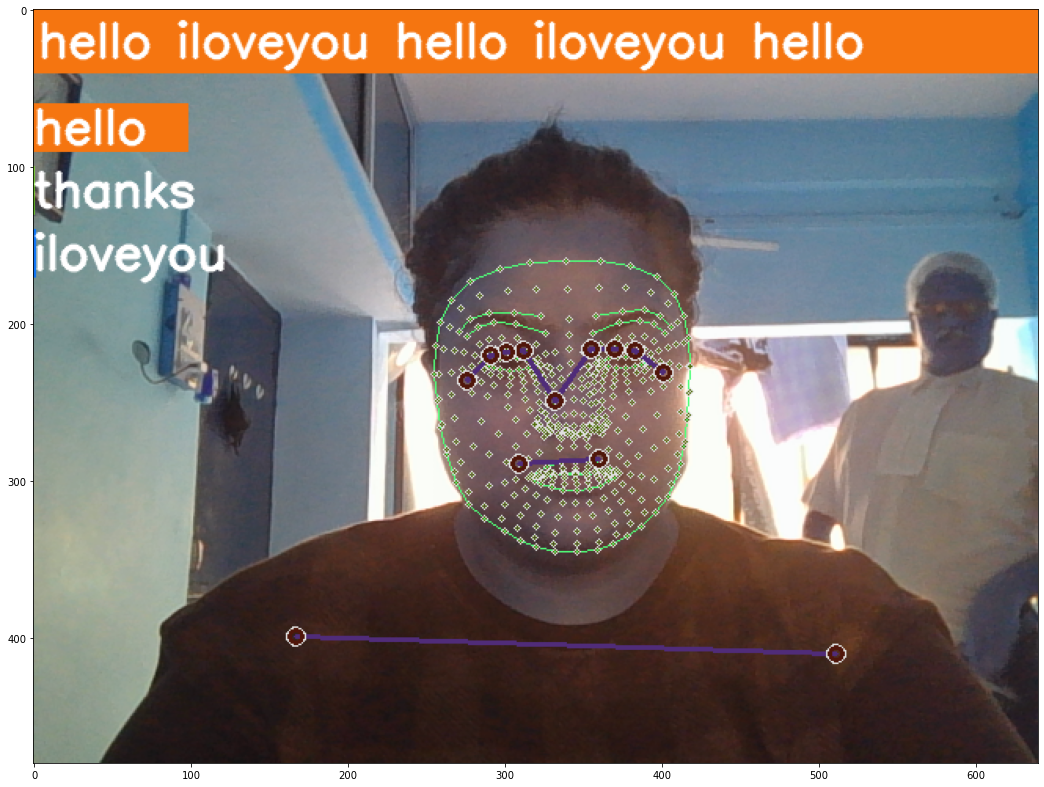

In [53]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [56]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('HAPPY HANDS', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.